# Stellar SEDs

In [52]:
%matplotlib inline
import os
import sys
sys.path.append('../pythonlib/')
import psf_toolkit as tk

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from tqdm import tqdm
from astropy.io import fits
import time
from matplotlib.colors import cnames


### Pyplot parameters

In [53]:
plt.rcParams['figure.autolayout'] = False
plt.rcParams['axes.labelsize'] = 18 
plt.rcParams['axes.titlesize'] = 20 
plt.rcParams['font.size'] = 16 
plt.rcParams['lines.linewidth'] = 1.3 # he has 2.0 here but I like 1.3 better
plt.rcParams['lines.markersize'] = 8 
plt.rcParams['legend.fontsize'] = 14 
plt.rcParams['text.usetex'] = True 
plt.rcParams['font.family'] = 'serif' 
plt.rcParams['font.serif'] = 'cm'

# Paths and imports

In [54]:
load_path = '/Users/tliaudat/Documents/PhD/codes/WF_PSF/notebooks/explore_SEDs/morgan_psfs/'
save_path = '/Users/tliaudat/Documents/PhD/codes/WF_PSF/notebooks/explore_SEDs/save_SEDs/'
sed_path = '/Users/tliaudat/Documents/PhD/codes/WF_PSF/notebooks/explore_SEDs/input_SEDs/Pickles/'

if not os.path.exists(save_path):
    os.makedirs(save_path)

SED_names = ['o5', 'b0', 'b57', 'a0', 'a5', 'f0', 'f5', 'g0', 'g5', 'k0', 'k5', 'm0', 'm5']
nb_sed = len(SED_names)

# SEDs

Load and plot SEDs:

In [55]:
all_lbdas = []
all_seds = []
for sedn in SED_names:
    hdufile = fits.open(sed_path+'J_PASP_110_863_{}v.dat.gz.fits'.format(sedn))
    lbda = hdufile[1].data['lambda']
    mask = (lbda>4000) * (lbda<10500)
    all_lbdas += [lbda[mask]]
    all_seds += [hdufile[1].data['nflam'][mask]]
all_lbdas = np.array(all_lbdas)
all_seds = np.array(all_seds)
print(all_lbdas.shape, all_seds.shape)


(13, 1299) (13, 1299)


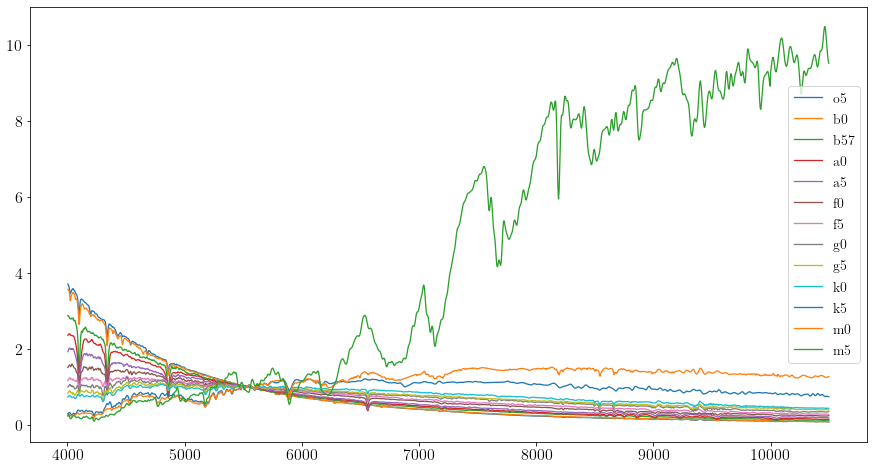

In [56]:
plt.rcParams['figure.figsize'] = 15,8

for lbda,sed,name in zip(all_lbdas, all_seds, SED_names):
    plt.plot(lbda,sed,label=name)
plt.legend()
plt.show()

Get 71-bins and 12-bins, VIS band, normalized SEDs.

#[NEWDATA]: **note this isn't perfect, you're compressing the SEDs ever so slightly since, say, the 500nm bin is going to *start* at 500, end to its right, except it's the PSF at precisely 500 we'll give it. It almsot certainly doesn't matter, but fix it if you can?**

In [57]:
full_lbdas = all_lbdas[0]
n_lbdas = 352 # 71

In [58]:
vismask = (full_lbdas>=5450) * (full_lbdas<=9050)
lbdas = full_lbdas[vismask]/10
vis_seds = all_seds[:,vismask]
print(vis_seds.shape)

(13, 721)


In [59]:
lbda_bins = np.linspace(550,900,13)
print(lbda_bins, len(lbda_bins))

all_bins = np.linspace(550,900,n_lbdas+1)
print(all_bins, len(all_bins))

[550.         579.16666667 608.33333333 637.5        666.66666667
 695.83333333 725.         754.16666667 783.33333333 812.5
 841.66666667 870.83333333 900.        ] 13
[550.         550.99431818 551.98863636 552.98295455 553.97727273
 554.97159091 555.96590909 556.96022727 557.95454545 558.94886364
 559.94318182 560.9375     561.93181818 562.92613636 563.92045455
 564.91477273 565.90909091 566.90340909 567.89772727 568.89204545
 569.88636364 570.88068182 571.875      572.86931818 573.86363636
 574.85795455 575.85227273 576.84659091 577.84090909 578.83522727
 579.82954545 580.82386364 581.81818182 582.8125     583.80681818
 584.80113636 585.79545455 586.78977273 587.78409091 588.77840909
 589.77272727 590.76704545 591.76136364 592.75568182 593.75
 594.74431818 595.73863636 596.73295455 597.72727273 598.72159091
 599.71590909 600.71022727 601.70454545 602.69886364 603.69318182
 604.6875     605.68181818 606.67613636 607.67045455 608.66477273
 609.65909091 610.65340909 611.64772727 612.6

In [60]:
sed12 = []
lbda12 = []
for lb, rb in zip(lbda_bins,lbda_bins[1:]):
    mask = (lbdas<rb) * (lbdas>=lb)
    sed12 += [np.mean(vis_seds[:,mask],axis=1)]
    lbda12 += [(lb+rb)/2]
sed12 = np.array(sed12).T
print(sed12.shape)

(13, 12)


In [61]:
sed70 = []
lbda70 = []
for lb, rb in zip(all_bins,all_bins[1:]):
    mask = (lbdas<rb) * (lbdas>=lb)
    sed70 += [np.mean(vis_seds[:,mask],axis=1)]
    lbda70 += [(lb+rb)/2]
sed70 = np.array(sed70).T
print(sed70.shape)

(13, 352)


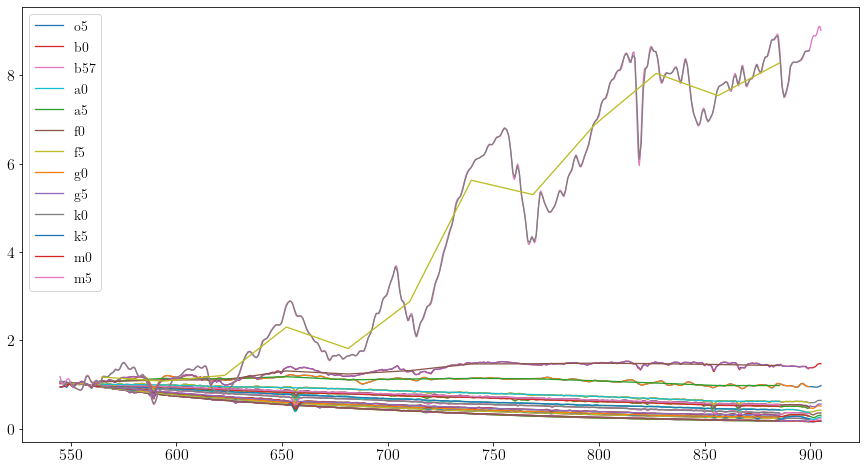

In [62]:
for j,(sed,s70,s12,name) in enumerate(zip(vis_seds, sed70, sed12, SED_names)):
    plt.plot(lbdas,sed,label=name)#,c=cnames.keys()[j])
    plt.plot(lbda70,s70)#,c=cnames.keys()[j])
    plt.plot(lbda12,s12)#,c=cnames.keys()[j])
plt.legend()
plt.show()

In [63]:
# Normalize
sed70 /= np.sum(sed70,axis=1).reshape(-1,1)
sed12 /= np.sum(sed12,axis=1).reshape(-1,1)

### Using a large number of bins (350)

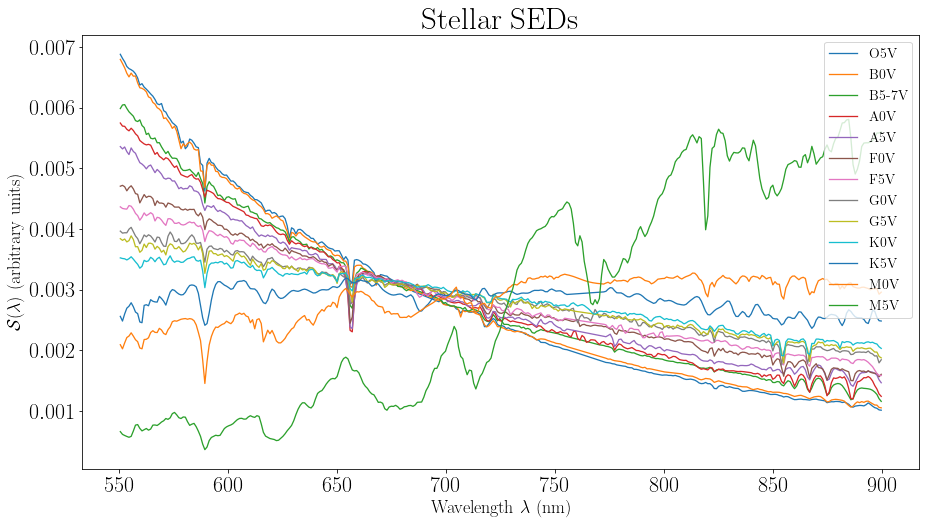

In [64]:
plt.rcParams['axes.titlesize'] = 31 
plt.rcParams['font.size'] = 22

SED_naames = ['O5V', 'B0V', 'B5-7V', 'A0V', 'A5V', 'F0V', 'F5V', 'G0V', 'G5V', 'K0V', 'K5V', 'M0V', 'M5V']

for j,(sed,s70,s12,name) in enumerate(zip(vis_seds, sed70, sed12, SED_naames)):
    #plt.plot(lbdas,sed,label=name)
    #plt.plot(lbda12,s12, c=cnames.keys()[j])#, lw=3, alpha=.3)
    plt.plot(lbda70,s70, label=name)#, c=cnames.keys()[j])
    plt.xlabel(r'Wavelength $\lambda$ (nm)')
    plt.ylabel(r'$\mathcal{S}(\lambda)$ (arbitrary units)')
plt.legend()
plt.title('Stellar SEDs')
plt.savefig(save_path + '/Stellar_SEDs.pdf')
plt.show()

### Using a reduced number of bins (12)

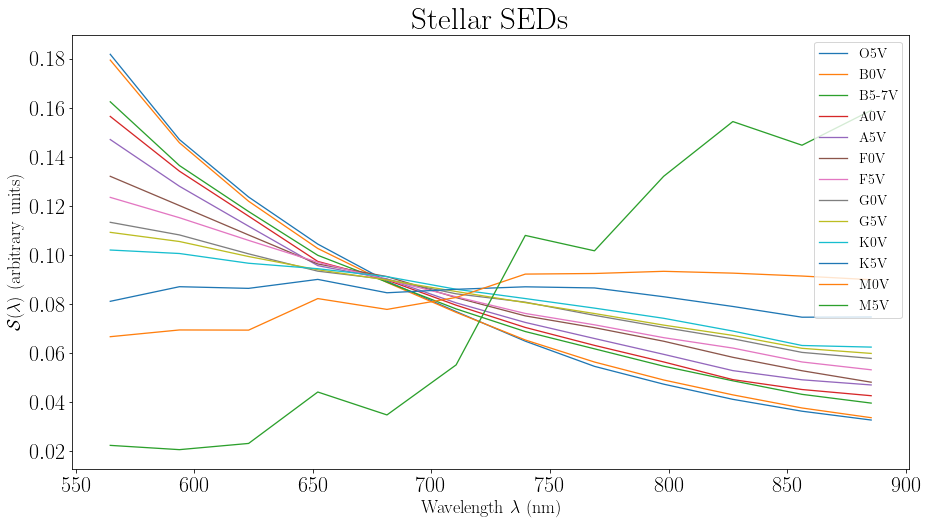

In [65]:
plt.rcParams['axes.titlesize'] = 31 
plt.rcParams['font.size'] = 22

SED_naames = ['O5V', 'B0V', 'B5-7V', 'A0V', 'A5V', 'F0V', 'F5V', 'G0V', 'G5V', 'K0V', 'K5V', 'M0V', 'M5V']

for j,(sed,s70,s12,name) in enumerate(zip(vis_seds, sed70, sed12, SED_naames)):
    #plt.plot(lbdas,sed,label=name)
    plt.plot(lbda12,s12, label=name)#, c=cnames.keys()[j])#, lw=3, alpha=.3)
#     plt.plot(lbda70,s70, label=name)#, c=cnames.keys()[j])
    plt.xlabel(r'Wavelength $\lambda$ (nm)')
    plt.ylabel(r'$\mathcal{S}(\lambda)$ (arbitrary units)')
plt.legend()
plt.title('Stellar SEDs')
# plt.savefig(save_path + '/Stellar_SEDs.pdf')
plt.show()

In [66]:
np_lbda70 = np.array(lbda70)

In [67]:
# Save SED and wavelengths

np.save(save_path+'/SEDs.npy', sed70)
np.save(save_path+'/lambdas.npy', lbda70)
